In [1]:
# Importing warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Step 1: Reading and Understanding the Data

In [3]:
data = pd.read_csv('day.csv')

In [5]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
data.shape

(730, 16)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Step 2: Visualising the Data

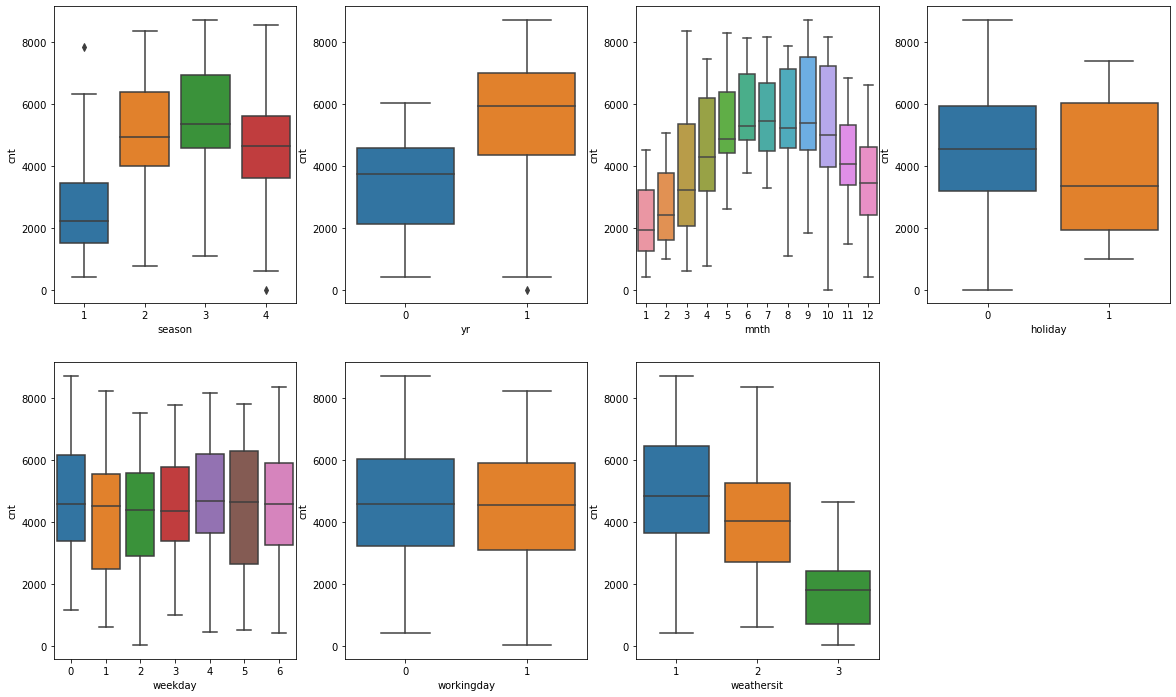

In [9]:
# Visualising Categorical variables

plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = data)
plt.subplot(2,4,2)
sns.boxplot(x = 'yr', y = 'cnt', data = data)
plt.subplot(2,4,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = data)
plt.subplot(2,4,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = data)
plt.subplot(2,4,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = data)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = data)
plt.subplot(2,4,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = data)
plt.show()

## Observations:
Demand for bikes is hightest in Fall (season-3).
Demand for bikes is more in 2019 when compared to 2018
Demand is highest in the month of September
Demand is highest when weather is Clear, Few clouds, Partly cloudy, Partly cloudy

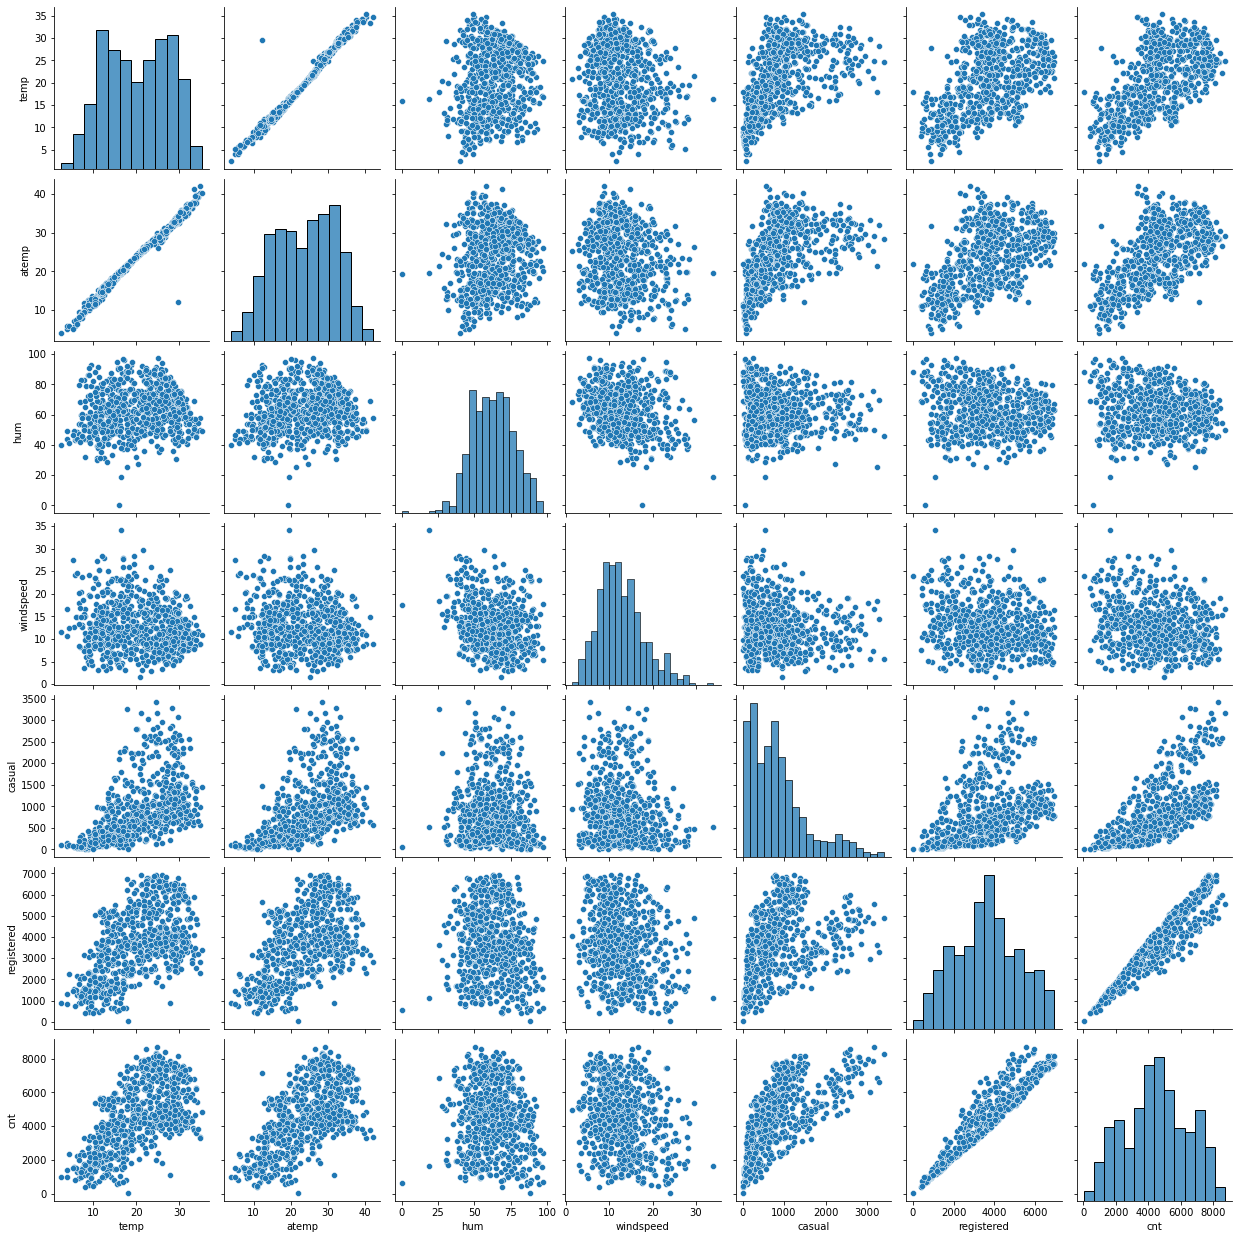

In [10]:
# Visualising Numerical variables

num_vars = ['temp','atemp','hum','windspeed','casual','registered','cnt']
sns.pairplot(data[num_vars])
plt.show()

## Observations

Positive correlation exists between temp and cnt variables
Positive correlation exists between atemp and cnt variables
Positive correlation exists between registered and cnt variables

Looks like there is stong correlation between temp and atemp variables. So, one of these variables may be dropped


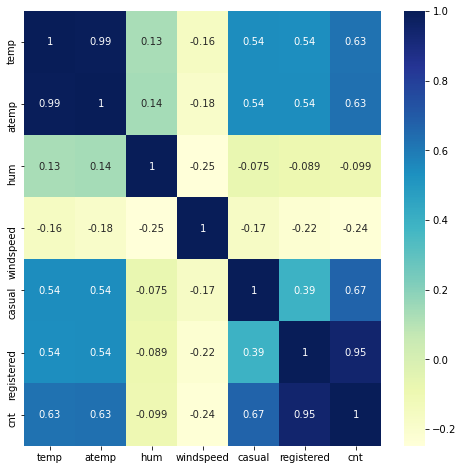

In [12]:
# Correlation for numerical variables

plt.figure(figsize = (8, 8))
sns.heatmap(data[num_vars].corr(), annot = True, cmap="YlGnBu")
plt.show()

## Observations

Registered users is strogly correlated with taget variable cnt.
Positive correlation exists casual users and cnt variables.
Positive correlation exists between temp and cnt variables.
Positive correlation exists between atemp and cnt variables. 
Looks like there is stong correlation between temp and atemp variables. So, one of these variables may be dropped

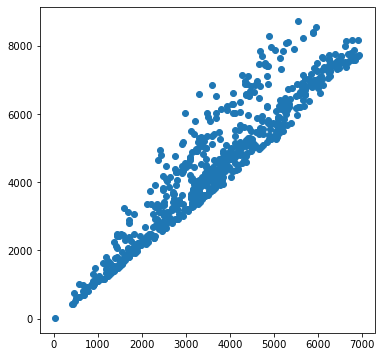

In [13]:
plt.figure(figsize=[6,6])
plt.scatter(data.registered, data.cnt)
plt.show()

## Step3 Creating dummy variables

In [14]:
# Creating dummy variables for all those categorical columns with more than 2 levels

dummy_season = pd.get_dummies(data['season'], drop_first = True)
dummy_season.rename(columns = {1:'spring', 2: 'summer', 3: 'fall', 4: 'winter'}, inplace=True)

dummy_mnth = pd.get_dummies(data['mnth'], drop_first = True)
dummy_mnth.rename(columns = {1:'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}, inplace=True)

dummy_weekday = pd.get_dummies(data['weekday'], drop_first = True)
dummy_weekday.rename(columns = {0:'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5:'Friday', 6 : 'Saturday'}, inplace=True)

dummy_weathersit = pd.get_dummies(data['season'], drop_first = True)
dummy_weathersit.rename(columns = {1:'clear', 2: 'mist', 3: 'lightsnow', 4: 'heavyrain'}, inplace=True)

In [15]:
data = pd.concat([data, dummy_season], axis = 1)

In [16]:
data = pd.concat([data, dummy_mnth], axis = 1)

In [17]:
data = pd.concat([data, dummy_weekday], axis = 1)

In [18]:
data = pd.concat([data, dummy_weathersit], axis = 1)

In [19]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,...,Dec,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,mist,lightsnow,heavyrain
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,...,0,1,0,0,0,0,0,0,0,0
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,...,0,0,1,0,0,0,0,0,0,0
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,...,0,0,0,1,0,0,0,0,0,0
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,...,0,0,0,0,1,0,0,0,0,0
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,...,0,0,0,0,0,1,0,0,0,0


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 39 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
 16  summer      730 non-null    uint8  
 17  fall        730 non-null    uint8  
 18  winter      730 non-null    uint8  
 19  Feb         730 non-null    u

In [21]:
data = data.drop(['instant', 'dteday', 'season', 'weekday', 'mnth', 'weathersit', 'casual'], axis = 1)

In [22]:
data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,registered,cnt,summer,...,Dec,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,mist,lightsnow,heavyrain
0,0,0,1,14.110847,18.18125,80.5833,10.749882,654,985,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,670,801,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1229,1349,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1454,1562,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1518,1600,0,...,0,0,0,0,0,1,0,0,0,0


## Step 4: Splitting the data into Training set and Test set

In [23]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [24]:
df_train.shape

(510, 32)

In [25]:
df_test.shape

(219, 32)

## Step 5: Rescaling the features using MinMax scaler

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
scaler = MinMaxScaler()

In [28]:
vars = ['temp','atemp','hum','windspeed','registered','cnt']
df_train[vars] = scaler.fit_transform(df_train[vars])

In [29]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,registered,cnt,summer,...,Dec,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,mist,lightsnow,heavyrain
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.951776,0.864243,0,...,0,0,0,1,0,0,0,0,0,1
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.899220,0.827658,0,...,0,0,0,1,0,0,0,0,1,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.446145,0.465255,0,...,0,0,0,0,0,0,0,0,0,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.203869,0.204096,0,...,1,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.444701,0.482973,1,...,0,0,0,0,0,0,0,1,0,0


In [30]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,registered,cnt,summer,...,Dec,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,mist,lightsnow,heavyrain
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.523944,0.513620,0.245098,...,0.084314,0.154902,0.152941,0.135294,0.143137,0.147059,0.129412,0.245098,0.262745,0.24902
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.228175,0.224593,0.430568,...,0.278131,0.362166,0.360284,0.342373,0.350557,0.354512,0.335985,0.430568,0.440557,0.43287
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.353487,0.356420,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.525123,0.518638,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.696073,0.684710,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


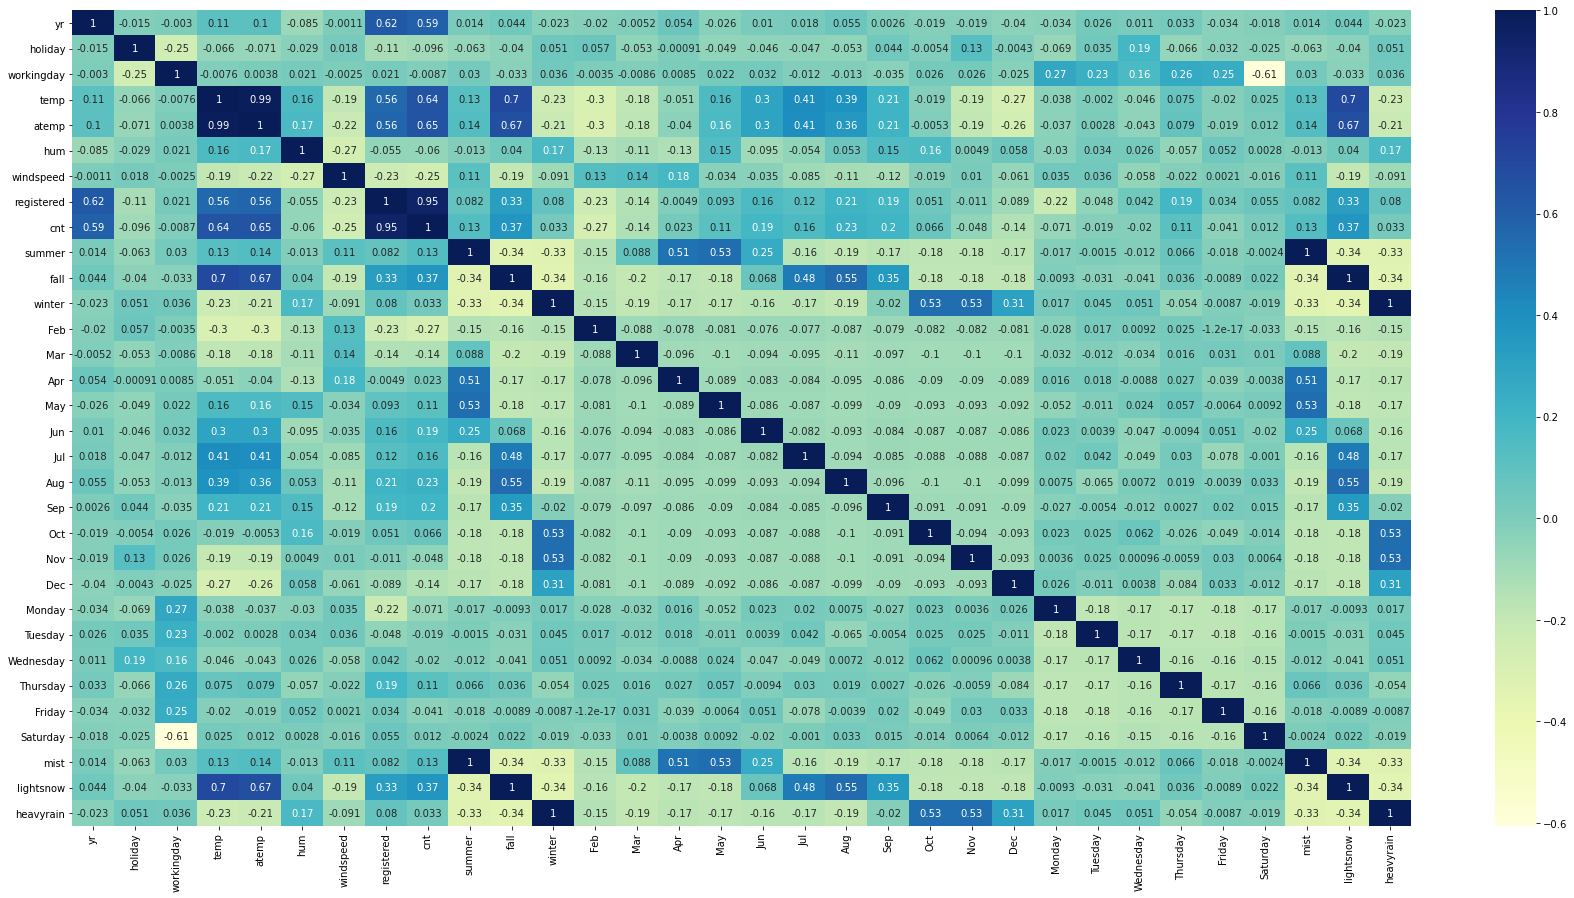

In [31]:
# Checking the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (30, 15))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

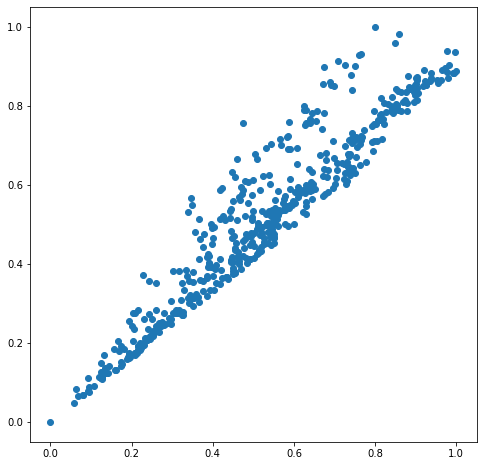

In [32]:
# Registered seems to be highly correlated with target variable cnt. So, plotting scttaer plot

plt.figure(figsize=[8,8])
plt.scatter(df_train.registered, df_train.cnt)
plt.show()

## Dividing into X and Y sets for the model building

In [33]:
y_train = df_train.pop('cnt')
X_train = df_train

## Step 6: Building the model

In [34]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [35]:
from sklearn.feature_selection import RFE
rfe = RFE(lr, 10)             # running RFE with 10 variables as output
rfe = rfe.fit(X_train, y_train)

In [36]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', False, 8),
 ('holiday', False, 22),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('registered', True, 1),
 ('summer', False, 11),
 ('fall', False, 18),
 ('winter', False, 16),
 ('Feb', False, 13),
 ('Mar', False, 20),
 ('Apr', False, 14),
 ('May', False, 12),
 ('Jun', False, 7),
 ('Jul', False, 6),
 ('Aug', False, 9),
 ('Sep', False, 19),
 ('Oct', False, 2),
 ('Nov', False, 21),
 ('Dec', False, 10),
 ('Monday', True, 1),
 ('Tuesday', True, 1),
 ('Wednesday', False, 4),
 ('Thursday', False, 3),
 ('Friday', False, 5),
 ('Saturday', True, 1),
 ('mist', True, 1),
 ('lightsnow', False, 17),
 ('heavyrain', False, 15)]

In [37]:
col = X_train.columns[rfe.support_]

In [38]:
X_train.columns[~rfe.support_]

Index(['yr', 'holiday', 'summer', 'fall', 'winter', 'Feb', 'Mar', 'Apr', 'May',
       'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Wednesday',
       'Thursday', 'Friday', 'lightsnow', 'heavyrain'],
      dtype='object')

In [39]:
import statsmodels.api as sm

X_train_lm = sm.add_constant(X_train[col])

lr_1 = sm.OLS(y_train, X_train_lm).fit() # Running the linear model

lr_1.params

const         0.055682
workingday   -0.072811
temp          0.161464
atemp        -0.026333
hum          -0.055100
windspeed    -0.056129
registered    0.891061
Monday        0.107719
Tuesday       0.049351
Saturday     -0.059271
mist          0.028285
dtype: float64

In [40]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     1022.
Date:                Wed, 12 Jan 2022   Prob (F-statistic):               0.00
Time:                        12:00:33   Log-Likelihood:                 820.52
No. Observations:                 510   AIC:                            -1619.
Df Residuals:                     499   BIC:                            -1572.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0557      0.015      3.694      0.0

## Checking VIF

In [41]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,atemp,353.45
1,temp,337.46
3,hum,10.35
5,registered,9.37
0,workingday,5.96
4,windspeed,3.74
8,Saturday,1.77
6,Monday,1.49
9,mist,1.39
7,Tuesday,1.37


In [42]:
X = X_train[col].drop('atemp', 1,)

X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [43]:
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     1137.
Date:                Wed, 12 Jan 2022   Prob (F-statistic):               0.00
Time:                        12:00:58   Log-Likelihood:                 820.46
No. Observations:                 510   AIC:                            -1621.
Df Residuals:                     500   BIC:                            -1579.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0553      0.015      3.682      0.0

In [44]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,10.54
2,hum,9.96
4,registered,9.27
0,workingday,5.96
3,windspeed,3.61
7,Saturday,1.76
5,Monday,1.48
8,mist,1.38
6,Tuesday,1.37


In [45]:
X = X.drop('temp', 1,)

X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [46]:
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     1005.
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          6.00e-303
Time:                        12:01:19   Log-Likelihood:                 761.79
No. Observations:                 510   AIC:                            -1506.
Df Residuals:                     501   BIC:                            -1467.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0627      0.017      3.725      0.0

In [47]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,hum,8.39
0,workingday,5.92
3,registered,5.55
2,windspeed,3.61
6,Saturday,1.76
4,Monday,1.45
5,Tuesday,1.36
7,mist,1.36


In [48]:
X = X.drop('hum', 1,)

X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [47]:
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     1149.
Date:                Wed, 12 Jan 2022   Prob (F-statistic):          2.50e-304
Time:                        11:44:04   Log-Likelihood:                 761.40
No. Observations:                 510   AIC:                            -1507.
Df Residuals:                     502   BIC:                            -1473.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0510      0.010      5.018      0.0

In [48]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,workingday,5.09
2,registered,4.19
1,windspeed,3.20
5,Saturday,1.60
3,Monday,1.44
4,Tuesday,1.36
6,mist,1.36


## Step 7: Residual Analysis of the train data

In [49]:
y_train_cnt = lr_4.predict(X_train_lm)

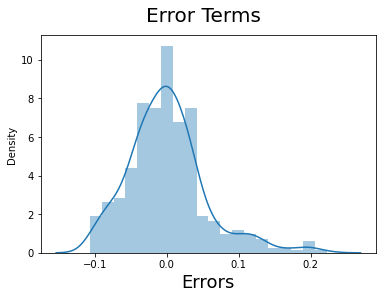

In [50]:
# check if the error terms are also normally distributed
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

## Step 8: Identifying the top 3 features

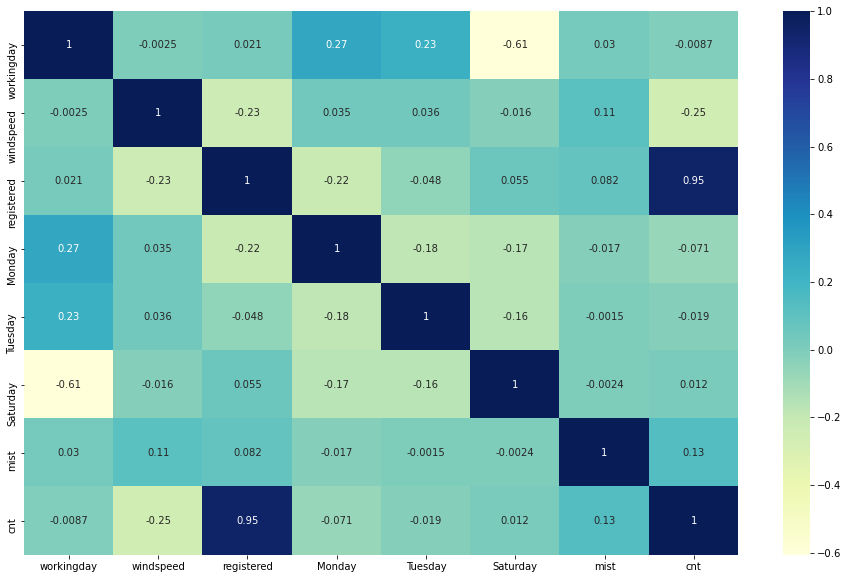

In [51]:
final_df = pd.concat([X,y_train], axis=1)
plt.figure(figsize = (16, 10))
sns.heatmap(final_df.corr(), annot = True, cmap="YlGnBu")
plt.show()

Below afe the 3 top features impacting the demand of the bikes
1. Registered users - positively correlated with demand
2. Windspeed - negatively correlated with demand
3. Weathersit 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist - positively correlated with demand

## Step 9 : Model Evaluation

In [52]:
from sklearn.metrics import r2_score

# Dividing into X_test and y_test

In [53]:
y_test = df_test.pop('cnt')
X_test = df_test

In [54]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          219 non-null    int64  
 1   holiday     219 non-null    int64  
 2   workingday  219 non-null    int64  
 3   temp        219 non-null    float64
 4   atemp       219 non-null    float64
 5   hum         219 non-null    float64
 6   windspeed   219 non-null    float64
 7   registered  219 non-null    int64  
 8   summer      219 non-null    uint8  
 9   fall        219 non-null    uint8  
 10  winter      219 non-null    uint8  
 11  Feb         219 non-null    uint8  
 12  Mar         219 non-null    uint8  
 13  Apr         219 non-null    uint8  
 14  May         219 non-null    uint8  
 15  Jun         219 non-null    uint8  
 16  Jul         219 non-null    uint8  
 17  Aug         219 non-null    uint8  
 18  Sep         219 non-null    uint8  
 19  Oct         219 non-null    

In [55]:
X_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,registered,summer,fall,...,Dec,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,mist,lightsnow,heavyrain
184,0,1,0,29.793347,33.27085,63.7917,5.459106,2978,0,1,...,0,0,0,1,0,0,0,0,1,0
535,1,0,1,32.082500,36.04875,59.2083,7.625404,5339,1,0,...,0,0,0,0,1,0,0,1,0,0
299,0,0,0,19.270000,22.85230,81.2917,13.250121,2419,0,0,...,0,0,0,0,0,0,1,0,0,1
221,0,0,1,31.433347,34.24915,42.4167,13.417286,3896,0,1,...,0,0,0,0,0,1,0,0,1,0
152,0,0,0,29.315000,32.19710,30.5000,19.583229,4232,1,0,...,0,0,0,0,0,0,1,1,0,0


In [56]:
# Adding constant variable to test dataframe
X_test_m4 = sm.add_constant(X_test)

In [57]:
# Creating X_test_m4 dataframe by dropping variables from X_test_m4

X_test_m4 = X_test_m4.drop(['yr','holiday','temp','atemp','hum','summer','fall','winter','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Wednesday','Thursday','Friday','lightsnow','heavyrain'], axis = 1)

In [58]:
X_test_m4.shape

(219, 8)

In [59]:
y_test.shape

(219,)

In [60]:
# Making predictions using the fourth model

y_pred = lr_4.predict(X_test_m4)

In [61]:
r2_score(y_test, y_pred)

0.586660722395702